# QA for batch mock analysis: cooked outputs (one mock)

This is a quality assessment notebook to make simple plots when analysing a batch of mocks. This notebook focuses on assessing the cooked outputs quickquasars, i.e. the spectra files and zcat files.

In [71]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import fitsio
import healpy as hp
import os

from lyacolore import utils

In [73]:
from batch_plot import *

In [66]:
# Point to realisation
qq_dir = '/global/cfs/projectdirs/desi/mocks/lya_forest/develop/london/qq_desi/v9.0/'
realisation = 'v9.0.0'
mocknames = ['desi-1.0-1000','desi-1.0-4']
cat_file = 'zcat.fits'

In [75]:
master = fitsio.FITS('/global/cfs/projectdirs/desi/mocks/lya_forest/london/v9.0/v9.0.0/master.fits')
zcat = fitsio.FITS(os.path.join(qq_dir,realisation,mocknames[1],cat_file))

In [79]:
mockid = np.random.choice(master[1]['MOCKID'][:])

In [81]:
print(master[1][:][master[1][:]['MOCKID']==mockid])

[(137.64186096, 12.08477688, 2.77336216, 2.7755096, 160314428, 268, 16)]


In [82]:
print(zcat[1][:][zcat[1][:]['TARGETID']==mockid])

[(0., [0., 0., 0., 0.], 2.7755096, 0., 0, 'QSO', '', 160314428, 25., '', 137.64186096, 12.08477688, 5.886873, 6.727811, 8.954512)]


## QSO sample

In [67]:
for m in mocknames:
    with fitsio.FITS(os.path.join(qq_dir,realisation,m,cat_file)) as h:
        print('zcat file contains: {} QSOs'.format(len(h[1][:])))

zcat file contains: 1071846 QSOs


OSError: FITSIO status = 104: could not open the named file
failed to find or open the following file: (ffopen)
/global/cfs/projectdirs/desi/mocks/lya_forest/develop/london/qq_desi/v9.0/v9.0.0
/desi-1.0-4/zcat.fits


$\langle z \rangle$ across the sky

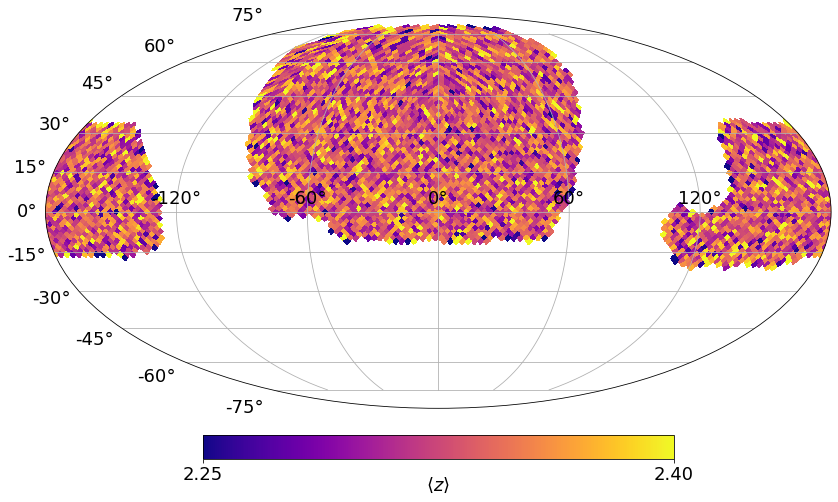

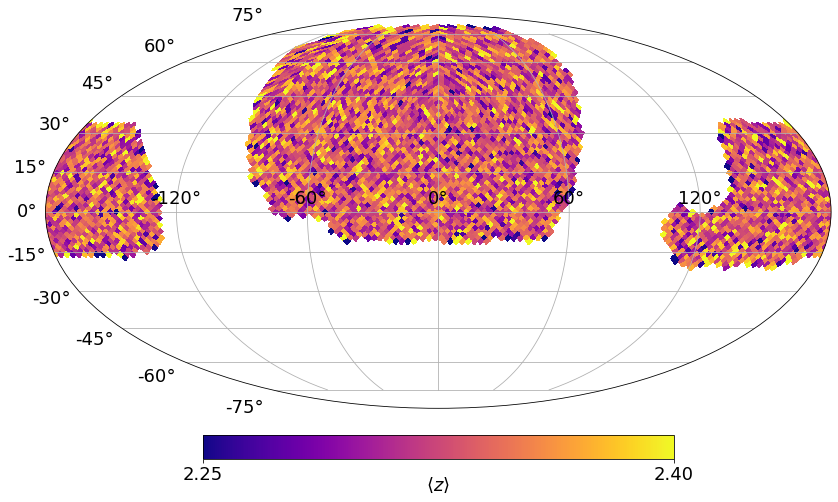

In [7]:
for m in mocknames:
    mean_quant_sky(os.path.join(qq_dir,realisation,m,cat_file),'zcat',nside=32,quant='z',vmin=2.25,vmax=2.4)

$n(z)$

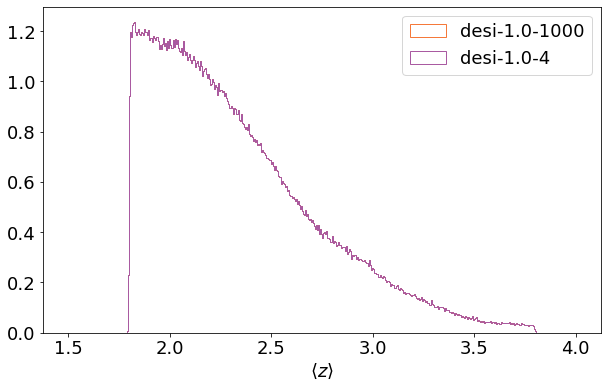

In [12]:
quant_hist([os.path.join(qq_dir,realisation,m,cat_file) for m in mocknames],
           ['zcat']*len(mocknames),
           labels = mocknames,
           quant = 'z',
           density = True,
          )

$n(z)$ across the sky

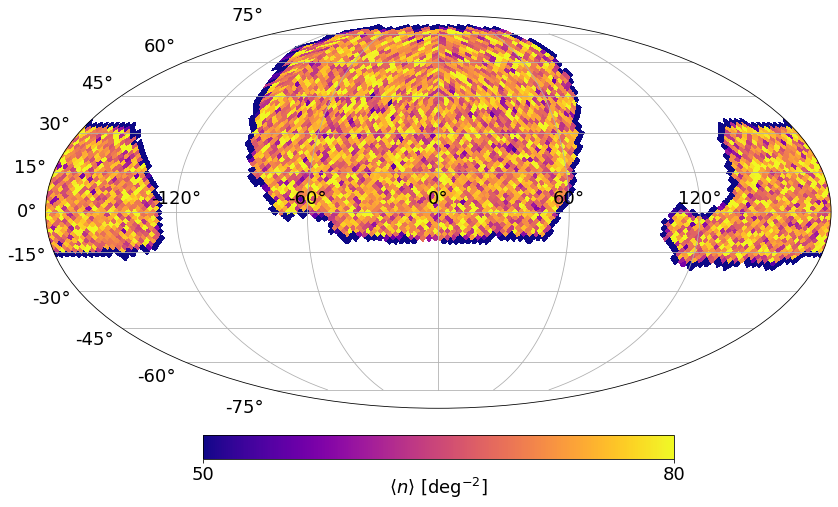

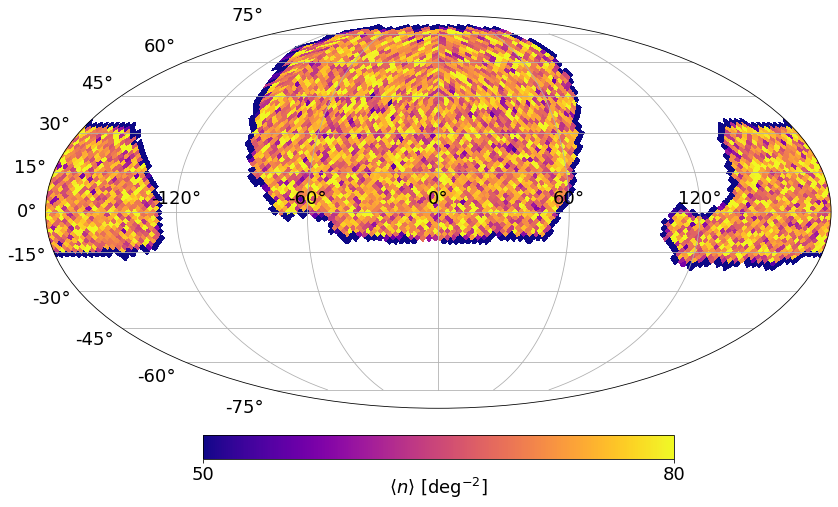

In [13]:
for m in mocknames:
    mean_quant_sky(os.path.join(qq_dir,realisation,m,cat_file),'zcat',nside=32,quant='ndens',vmin=50,vmax=80)

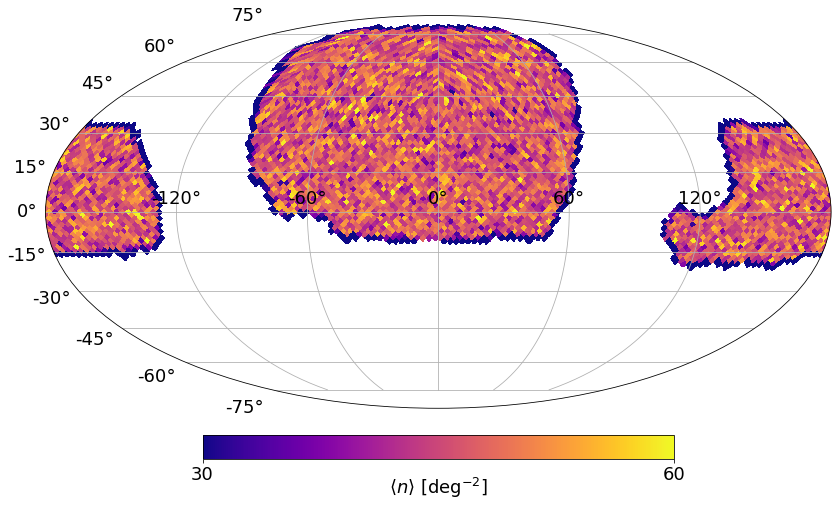

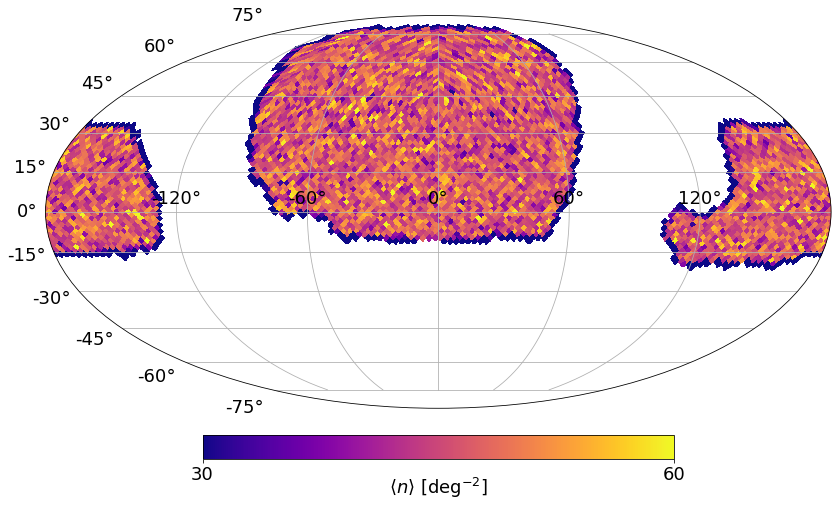

In [14]:
for m in mocknames:
    mean_quant_sky(os.path.join(qq_dir,realisation,m,cat_file),'zcat',nside=32,quant='ndens',vmin=30,vmax=60,zmin=2.1)

$n(m_R)$

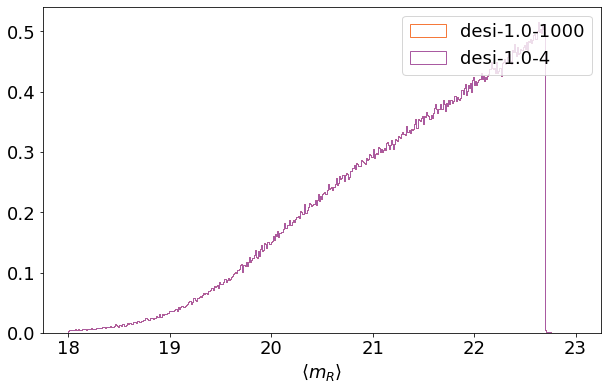

In [15]:
quant_hist([os.path.join(qq_dir,realisation,m,cat_file) for m in mocknames],
           ['zcat']*len(mocknames),
           labels = mocknames,
           quant = 'rmag',
           density = True,
          )

$\langle m_R \rangle$ across the sky

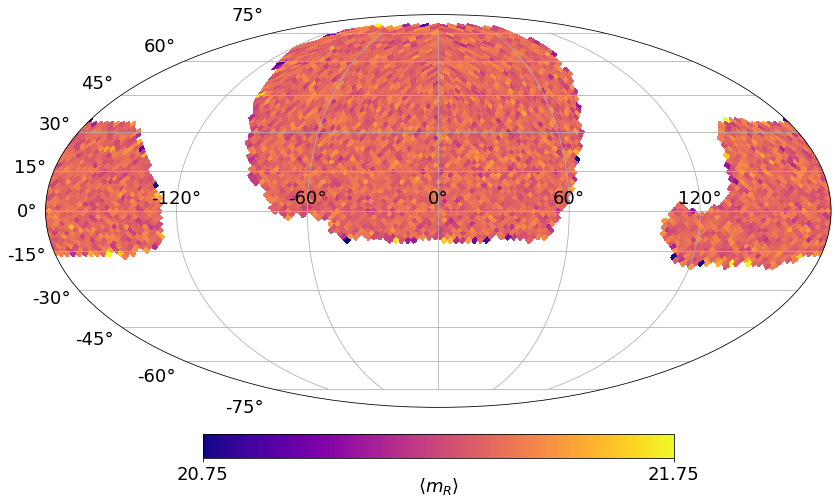

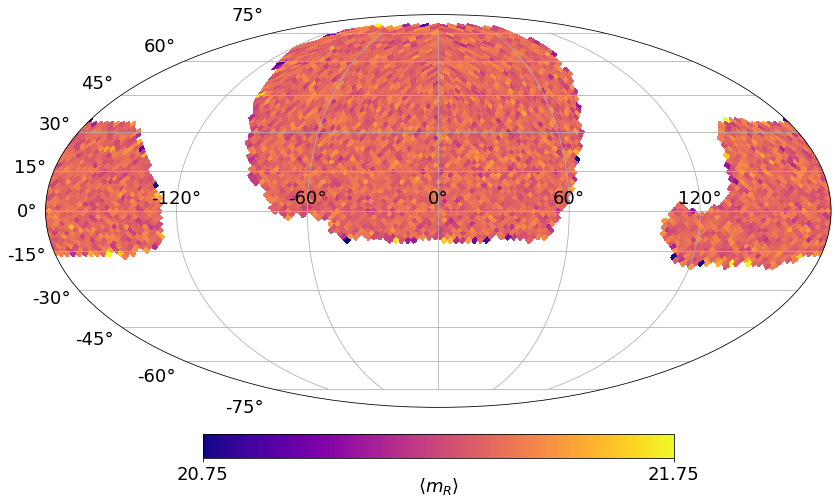

In [10]:
for m in mocknames:
    mean_quant_sky(os.path.join(qq_dir,realisation,m,cat_file),'zcat',nside=32,quant='rmag',vmin=20.75,vmax=21.75)

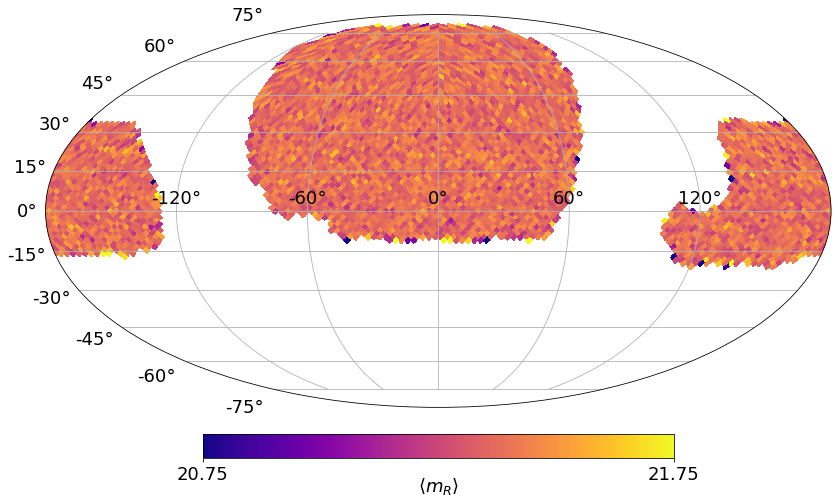

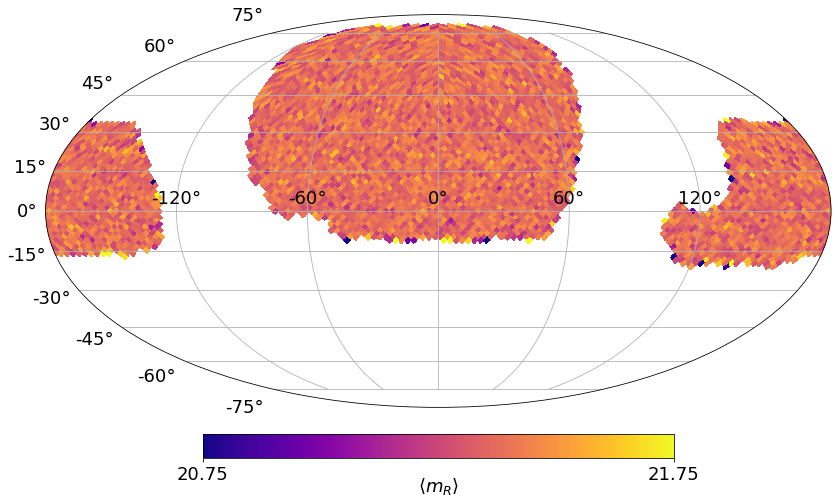

In [11]:
for m in mocknames:
    mean_quant_sky(os.path.join(qq_dir,realisation,m,cat_file),'zcat',nside=32,quant='rmag',vmin=20.75,vmax=21.75,zmin=2.1)

## Example spectra

Example spectra

In [68]:
ispec = 54
ipix = 33

In [69]:
m_zorders = {'desi-1.0-1000': 0, 'desi-1.0-4': -1}

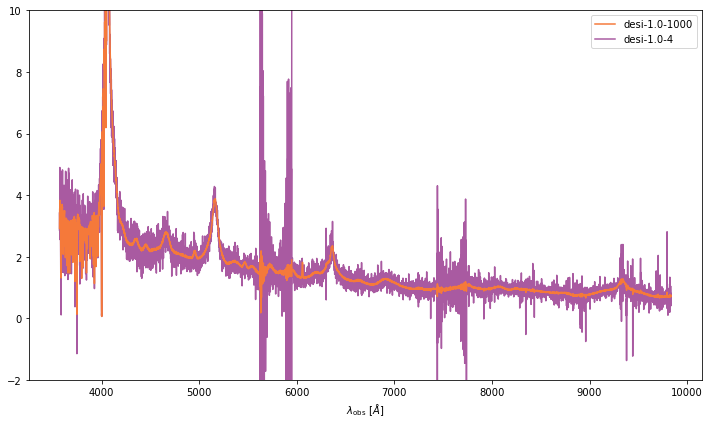

In [70]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
for i,m in enumerate(mocknames):
    h = fitsio.FITS(os.path.join(qq_dir,realisation,m,'spectra-16/{}/{}/spectra-16-{}.fits'.format(ipix//100,ipix,ipix)))
    for b in ['B','R','Z']:
        if b=='B':
            label = m
        else:
            label = None
        ax.plot(h['{}_WAVELENGTH'.format(b)][:],h['{}_FLUX'.format(b)][:,:][ispec,:],c=mycolours['C{}'.format(i)].format(i),zorder=m_zorders[m],label=label)

ax.legend()
ax.set_ylim(-2,10)
ax.set_xlabel(r'$\lambda_\mathrm{obs}~[\AA]$')
plt.tight_layout()

Spectra placed on top of each other

In [49]:
ipix = 33
ispecs = [54,55,56,57,58,59]

In [52]:
spacing = 12

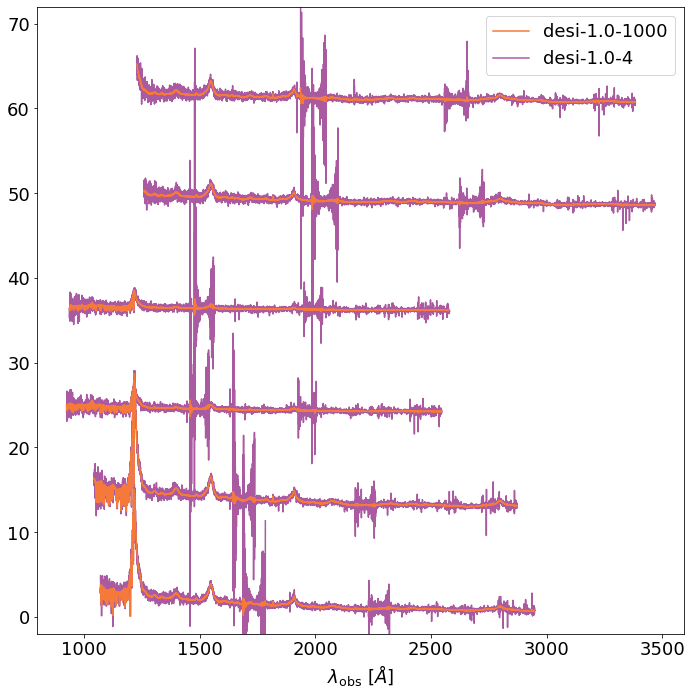

In [53]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
for i,m in enumerate(mocknames):
    
    cat = fitsio.FITS(os.path.join(qq_dir,realisation,m,cat_file))
    
    for j,ispec in enumerate(ispecs):
        h = fitsio.FITS(os.path.join(qq_dir,realisation,m,'spectra-16/{}/{}/spectra-16-{}.fits'.format(ipix//100,ipix,ipix)))
        
        tid = h[1][:]['TARGETID'][ispec]
        z = cat[1][:]['Z'][np.in1d(master[1][:]['TARGETID'],tid)]
        
        for b in ['B','R','Z']:
            if b=='B' and j==0:
                label = m
            else:
                label = None
            ax.plot(h['{}_WAVELENGTH'.format(b)][:]/(1+z),spacing*j + h['{}_FLUX'.format(b)][:,:][ispec,:],c=mycolours['C{}'.format(i)].format(i),zorder=m_zorders[m],label=label)

ax.legend()
ax.set_ylim(-2,spacing*len(ispecs))
ax.set_xlabel(r'$\lambda_\mathrm{obs}~[\AA]$')
plt.tight_layout()

Show a DLA

## Stacked spectra

Stack spectra in rest-frame wavelength